# Lecture 9: Functions

Before we start, please make sure you've loaded the lecture notebook  so you can work along.  I suggest you do this by splitting your screen in half, with one half for the notebook and the other half for the video.  You could also watch the video on another device while working along on the notebook. 



We'll start by running the cell below to set up our notebook.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

A few Python tips: 

* Access information for functions using '?'
<br>
<br>
* Find notebook path on computer

In [50]:
# Ask for help with a function by typing <function_name>?
np.arange?

In [3]:
# Print path to current directory... 
# type pwd and run the cell

In [51]:
pwd

'/Users/thao-nhiluu/Google Drive/AACC_285/MAT285_Lectures/lecture09'

## Histogram Review: Heights and Heredity ##

In [52]:
# Import file galton.csv as table, using Table.read_table()
galton=Table.read_table('galton.csv')
galton.show()

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


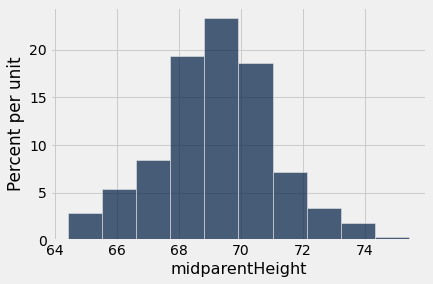

In [53]:
# Create a histogram for 'midparentHeight'; 
# use .hist method on 'galton' table.  Do not enter any bins.
galton.hist('midparentHeight')

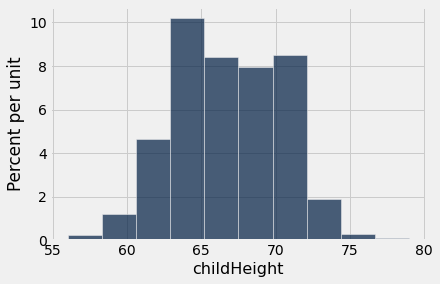

In [54]:
#Create a histogram for 'childHeight'
galton.hist('childHeight')

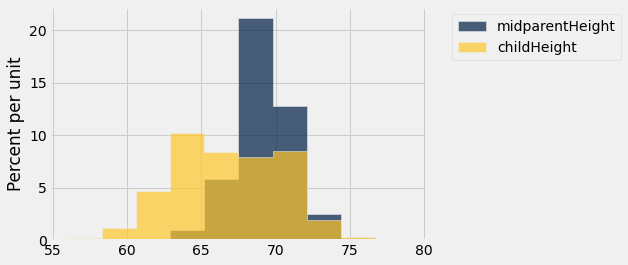

In [55]:
# Plot both histograms together
galton.hist('midparentHeight', 'childHeight')

## Functions ##

Some functions we've seen:  
* `abs()` takes an integer for an argument
* `min()` and `'max()` take a list of numbers or an array for an argument
* `float()` takes an integer or a string for an argument
* `np.arange()` takes two numbers and produces an array; optional third argument for increment size
* and more...

More libraries of functions:
* datascience - for our class
* numpy - mathematics
* pandas - data science applications
* matplotlib - for generating graphs
* scikitlearn - for machine learning
* and many more...


In [2]:
#Define the square function, which will square its argument

def square(x):
  """ This function squares its argument. """
  return x**2

<img src = "function def.png" width="700" height="800">

In [56]:
# Call the 'square' function at the argument 3
square(3)

9

In [57]:
# Set the name 'num' equal to the value 4
num = 4

In [58]:
#Evaluate the `square` function 
square(num)

16

### A Note About Scopes

'Scope' of a defined name: how broadly the name's value is recognized.

* A name assigned inside of a function body has *local scope*.  It only has this value 'inside of the function'.
* A name assigned outside of a function body has *global scope*.  It can be accessed and used anywhere in the notebook.  

<a href="https://www.w3schools.com/python/python_scope.asp"> Read more about scopes here.</a>

In [3]:
# Even though we used x for a name 
# inside of the 'square' function, it's not defined...
x

NameError: name 'x' is not defined

In [4]:
# assign the name x to the value 5:
x=5

In [5]:
square(x)

25

In [6]:
square(2*x)

100

In [7]:
x

5

### Evaluation at different types

Functions can often be evaluated at more than one type.  

In [8]:
# Define a new function, called 'triple',
# which will triple the value of a number

def triple(x):
    """ This function takes a single argument \ 
         and multiplies it by 3."""
    return(3*x)

In [9]:
# Evaluate the 'triple' function at a string:
triple('ha')

'hahaha'

In [10]:
# Evaluate the 'triple' function at an array:
triple(np.arange(4))

array([0, 3, 6, 9])

In [11]:
np.arange(4)

array([0, 1, 2, 3])

### Discussion problem: 
write a function that takes an array of numbers and replaces each number with the percentage of the array sum it represents.  For example, let **A** be the array [2,2,4].  The sum of the elements of **A** is 8.  The first and second elements, 2 and 2, are each 25% of that total.  The last element, 4, is 50% of that total.  So we would like a function which, when evaluated at this array, returns the array [25, 25, 50]. 

*Hint: To find a number's percent of total, we divide the number by the sum of elements in the array, and then multiply this float by 100. So how can we do this for an entire array?*

In [13]:
# Define your function here.  In your signature, 
# give the function the name 'percent_of_total'.  
# Use the np.round function to round all 
# entries of the output by 2 decimal places.

def percent_of_total(s):
    return np.round(s/sum(s)*100, 2)

In [14]:
# Test the function 'percent_of_total' on an array
percent_of_total(make_array(2,2,4))


array([25., 25., 50.])

### Multiple Arguments

Example: the geometric mean of two numbers is the square root of their product. This function has two arguments. For example, the geometric mean of 3 and 4 is $\sqrt{3 \cdot 4} = \sqrt{12} \approx 3.464$.



In [16]:
# define a new function which calculates 
# the geometric mean of two numbers

def geom_mean(x,y):
    product=x*y
    return np.round(product**0.5, 2)

In [17]:
# Test geom_mean

geom_mean(3,4)

3.46

## Apply ##

The `.apply` method allows us to apply a function to all elements in a table column.  

In [26]:
# A new table of cases assigned to 4 different police detectives

cases = Table().with_columns(
    'Detective', make_array('Peralta', \
                            'Santiago', 'Diaz', 'Boyle'),
    'Number of cases', make_array(29, 32, 38, 15)
)
cases

Detective,Number of cases
Peralta,29
Santiago,32
Diaz,38
Boyle,15


In [27]:
#  Define a function that caps its argument at 30. 
#  Hint: use the min function

def cap_at_30(x):
    return min(x, 30)

<font color='green'> </font>

In [28]:
# Test our function 

cap_at_30(31), cap_at_30(29)

(30, 29)

<font color='green'> </font>

#### Apply method syntax:
< table >.apply ( < function_name > ,  '< column name >')

In [30]:
# Use .apply method to apply the cap_at_30 function 
# to every number in the 'Number of cases' column

cases.apply(cap_at_30, 'Number of cases')

array([29, 30, 30, 15])

In [31]:
cases

Detective,Number of cases
Peralta,29
Santiago,32
Diaz,38
Boyle,15


In [34]:
# Write a function that outputs an array whose 
# elements are strings,
# each of which tells us how 
# many cases a detective has (after the cap).

def name_and_cases(name, case):
    capped_cases=min(30,case)
    return 'Detective ' + name + \
    ' has ' + str(capped_cases)+ ' cases'


In [35]:
# evaluate name_and_cases at name = 'Peralta' and case = 29:
name_and_cases('Peralta', 29)

'Detective Peralta has 29 cases'

In [37]:
# Apply the function 'name_and_cases' to the 'cases' table...
cases.apply(name_and_cases, 'Detective', 'Number of cases')

array(['Detective Peralta has 29 cases',
       'Detective Santiago has 30 cases', 'Detective Diaz has 30 cases',
       'Detective Boyle has 15 cases'], dtype='<U31')

To find out more about these amazing detectives, check out [the best precinct in New York City](https://www.nbc.com/brooklyn-nine-nine) : ) 